<a href="https://colab.research.google.com/github/s-hashirahmed/cif10/blob/main/c10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

Importing all the necessary packages

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from keras.layers.convolutional import Conv2D

Defining Constants

In [3]:
from keras.utils import np_utils # encoding
import matplotlib.pyplot as plt #plotting
import seaborn as sns

# 60k images with 32x32 dimensions each and 3 channels (r,g,b)

IMAGE_CHANNELS = 3
IMAGE_ROWS = 32
IMAGE_COLUMNS = 32

#CONSTANTS

BATCH_SIZE = 128
VALIDATION_SPLIT = .2
VERBOSE = 1
CLASSES = 2
EPOCHS = 10

OPTIM = optimizers.Adam(learning_rate=0.01) # learning rate to be defined

# Downloading the Data

In [4]:
(X_train, y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 9s 0us/step


# Data Preprocessing

Normalizing the dataset, dividing the data by 255
As the pixel values ranges from 0-256

In [5]:

X_train = X_train/255 # normalize
X_test = X_test/255

Reshaping train and test sets

In [6]:
X_train.reshape((50000,32,32,3)).astype('float32')
X_test.reshape((10000, 32,32,3)).astype('float32')

samples , height, width, channel = X_train.shape


Binary Encoding

In [7]:
y_prac_train=np.where(np.isin(y_train, [[0],[1],[8],[9]]),0,1) # 0 where label is vehicle
# print(np.unique(y_prac_train))

y_prac_test=np.where(np.isin(y_test, [[0],[1],[8],[9]]),0,1)
# np.unique(y_prac_test)
y_prac_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [8]:
X_train.shape
y_train.shape

(50000, 1)

Encoder to one hot

In [9]:
y_train = np_utils.to_categorical(y_prac_train,2)
y_test = np_utils.to_categorical(y_prac_test,2)

y_train.shape

(50000, 2)

reshaping for shallow algorithms

In [10]:
X_train_reshaped_for_shallow= X_train.reshape(X_train.shape[0],3072)
X_test_reshaped_for_shallow = X_test.reshape(X_test.shape[0],3072) # since knn needs 2 dims.. we change the dimensions to (50000, 32x32x3=)

visualizing a random images

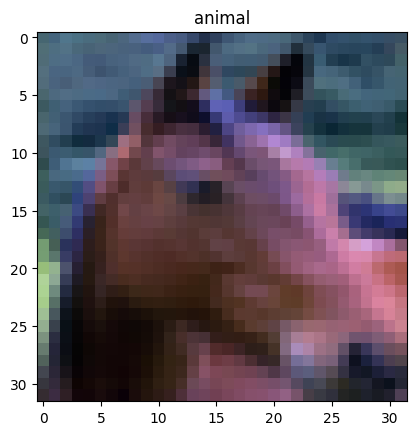

In [11]:
a = np.random.choice(range(len(X_train)))

classes = {1: 'vehicle', 0:'animal'} # dictionary mapping two classes..

plt.title(classes[y_train[a][0]])
plt.imshow(X_train[a], interpolation='none')

Building Two Different CNN Architectures

In [12]:
def build_m1(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(32, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  return model

def build_m2(input_shape=(32,32,3), classes=2, learning_rate=.001):
  model = models.Sequential()
  model.add(layers.Conv2D(128, (5,5), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))

  model.add(layers.Dropout(.25))

  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (2,2), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))



  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(2, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

  return model


Building and Compiling the model

In [13]:
model_1 = build_m1() # as it is
model_2 = build_m1(learning_rate=.0001) #
model_3 = build_m1(learning_rate=.00001)

model_4 = build_m2() # as it is
model_5 = build_m2(learning_rate=.0001) #
model_6 = build_m2(learning_rate=.00001)


fitting the model om train set

In [14]:
hist_1 = model_1.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2)
hist_2 = model_2.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2) # to be replaces by constant set abve
hist_3 = model_3.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2)


Epoch 1/10
313/313 [==============================] - 16s 11ms/step - loss: 0.3288 - accuracy: 0.8630 - val_loss: 0.2611 - val_accuracy: 0.9007
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2542 - accuracy: 0.8981 - val_loss: 0.2509 - val_accuracy: 0.9028
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2354 - accuracy: 0.9053 - val_loss: 0.2263 - val_accuracy: 0.9116
Epoch 4/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2201 - accuracy: 0.9127 - val_loss: 0.2308 - val_accuracy: 0.9055
Epoch 5/10
313/313 [==============================] - 2s 7ms/step - loss: 0.2080 - accuracy: 0.9171 - val_loss: 0.2143 - val_accuracy: 0.9124
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.1976 - accuracy: 0.9209 - val_loss: 0.1871 - val_accuracy: 0.9274
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.1822 - accuracy: 0.9278 - val_loss: 0.2050 - val_accuracy: 0.9277
Epoc

In [15]:
hist_4 = model_4.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)
hist_5 = model_5.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2) # to be replaces by constant set abve
hist_6 = model_6.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=10, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 10s 19ms/step - loss: 0.3200 - accuracy: 0.8642 - val_loss: 0.3575 - val_accuracy: 0.8915
Epoch 2/10
313/313 [==============================] - 5s 16ms/step - loss: 0.2619 - accuracy: 0.8926 - val_loss: 0.2696 - val_accuracy: 0.8963
Epoch 3/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2444 - accuracy: 0.9016 - val_loss: 0.2486 - val_accuracy: 0.8971
Epoch 4/10
313/313 [==============================] - 5s 17ms/step - loss: 0.2317 - accuracy: 0.9065 - val_loss: 0.2440 - val_accuracy: 0.8999
Epoch 5/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2220 - accuracy: 0.9102 - val_loss: 0.2530 - val_accuracy: 0.9006
Epoch 6/10
313/313 [==============================] - 5s 15ms/step - loss: 0.2102 - accuracy: 0.9142 - val_loss: 0.2163 - val_accuracy: 0.9153
Epoch 7/10
313/313 [==============================] - 5s 17ms/step - loss: 0.1981 - accuracy: 0.9219 - val_loss: 0.2106 - val_accuracy: 0.916

plotting accuracy

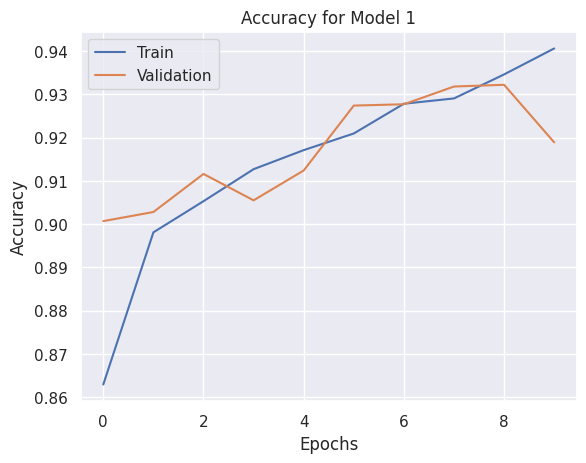

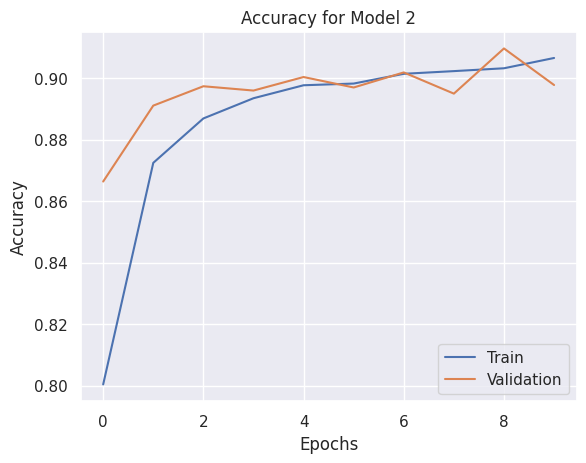

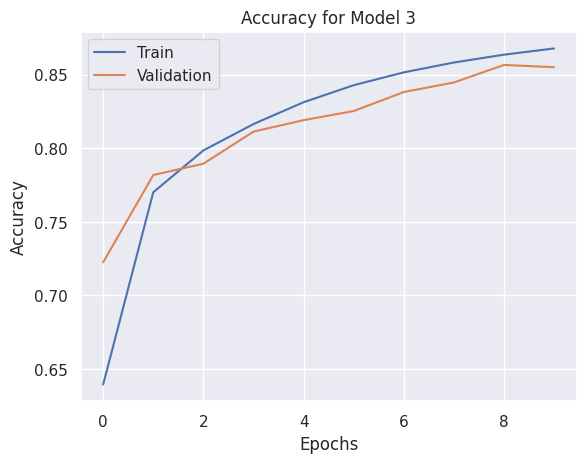

In [16]:
sns.set()
plt.plot(hist_1.history['accuracy'])
plt.plot(hist_1.history['val_accuracy'])
plt.title("Accuracy for Model 1")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title("Accuracy for Model 2")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title("Accuracy for Model 3")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()


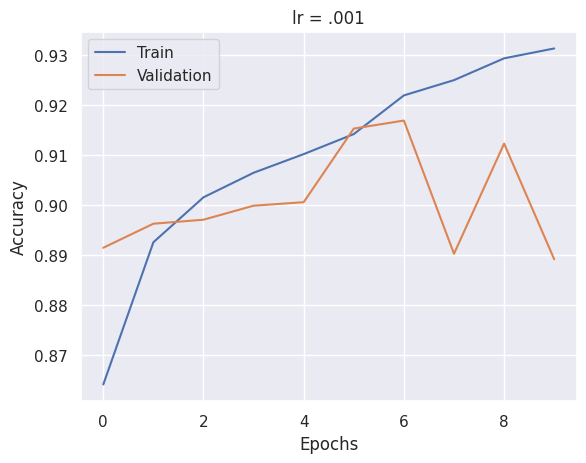

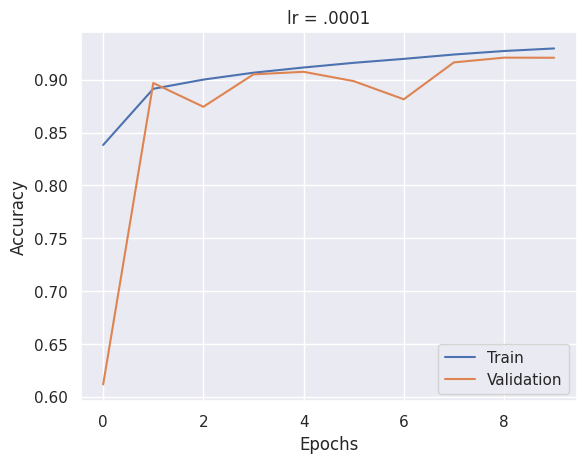

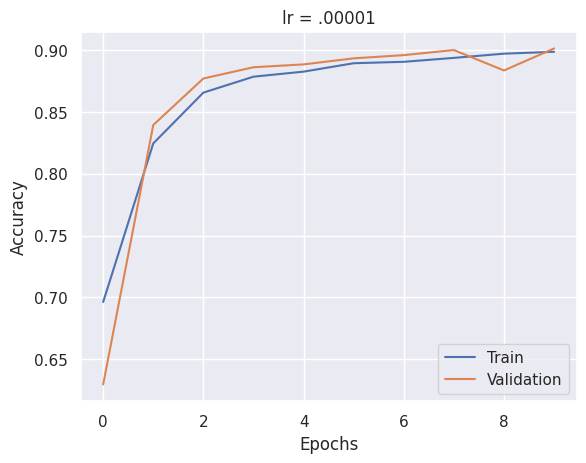

In [17]:
sns.set()
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title("lr = .001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_5.history['accuracy'])
plt.plot(hist_5.history['val_accuracy'])
plt.title("lr = .0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_6.history['accuracy'])
plt.plot(hist_6.history['val_accuracy'])
plt.title("lr = .00001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plotting loss

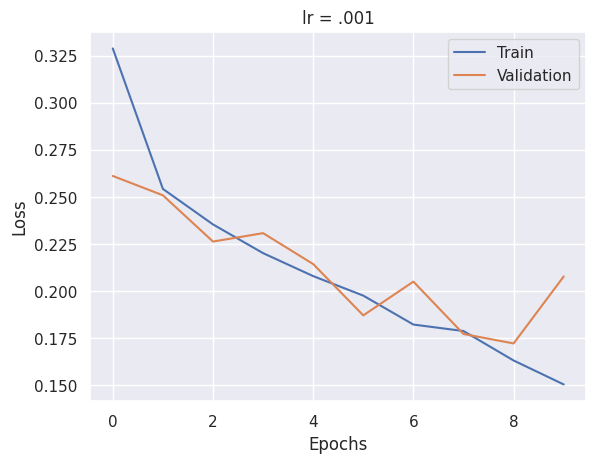

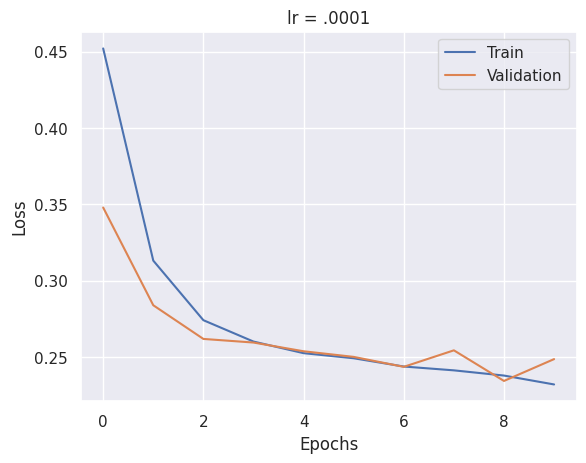

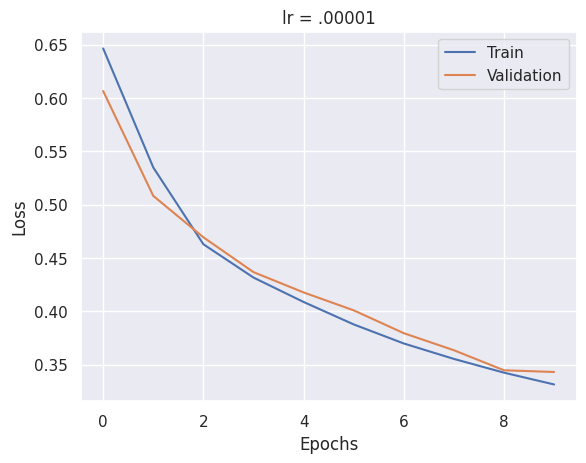

In [18]:
sns.set()
plt.plot(hist_1.history['loss'])
plt.plot(hist_1.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("lr = .001")
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title("lr = .0001")
plt.legend(['Train', 'Validation'])
plt.title("lr = .0001")
plt.show()


plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.title("lr = .00001")
plt.show()

In [19]:
metrics_1=model_1.evaluate(X_test,y_test)

print("\n Performance Scores for Model 1\n=========================")
print("Accuracy: ", metrics_1[1]*100)
print("Loss: ", metrics_1[0]*100)
print("=========================")

y_hat_1=model_1.predict(X_test)



metrics_2=model_2.evaluate(X_test,y_test)
print("\n Performance Scores for Model 2 \n=========================")
print("Accuracy: ", metrics_2[1]*100)
print("Loss: ", metrics_2[0]*100)
print("=========================")
y_hat_2=model_2.predict(X_test)



metrics_3=model_3.evaluate(X_test,y_test)
print("\n Performance Scores for Model 3\n=========================")
print("Accuracy: ", metrics_3[1]*100)
print("Loss: ", metrics_3[0]*100)
print("=========================")
y_hat_3=model_3.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2129 - accuracy: 0.9161

 Performance Scores for Model 1
Accuracy:  91.6100025177002
Loss:  21.285372972488403
313/313 [==============================] - 1s 4ms/step - loss: 0.2425 - accuracy: 0.9015

 Performance Scores for Model 2 
Accuracy:  90.14999866485596
Loss:  24.245715141296387
313/313 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8568

 Performance Scores for Model 3
Accuracy:  85.68000197410583
Loss:  33.889374136924744
313/313 [==============================] - 1s 2ms/step


Evaluating the model on test set|

In [20]:
metrics_4=model_4.evaluate(X_test,y_test)
print("\n Performance Scores for Model 3\n=========================")
print("Accuracy: ", metrics_4[1]*100)
print("Loss: ", metrics_4[0]*100)
print("=========================")
y_hat_4=model_4.predict(X_test)



metrics_5=model_5.evaluate(X_test,y_test)
print("\n Performance Scores for Model 3\n=========================")
print("Accuracy: ", metrics_5[1]*100)
print("Loss: ", metrics_5[0]*100)
print("=========================")

y_hat_5=model_5.predict(X_test)



metrics_6=model_6.evaluate(X_test,y_test)
print("\n Performance Scores for Model 3\n=========================")
print("Accuracy: ", metrics_6[1]*100)
print("Loss: ", metrics_6[0]*100)
print("=========================")

y_hat_6=model_6.predict(X_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.8884

 Performance Scores for Model 3
Accuracy:  88.84000182151794
Loss:  30.14291226863861
313/313 [==============================] - 1s 4ms/step - loss: 0.2022 - accuracy: 0.9188

 Performance Scores for Model 3
Accuracy:  91.87999963760376
Loss:  20.218662917613983
313/313 [==============================] - 2s 5ms/step - loss: 0.2400 - accuracy: 0.8994

 Performance Scores for Model 3
Accuracy:  89.9399995803833
Loss:  23.99515062570572
313/313 [==============================] - 1s 2ms/step


Displaying the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
y_test_temp_1 = np.argmax(y_test, axis=1)
y_hat_temp_1 = np.argmax(y_hat_1, axis=1)
cm_1 = confusion_matrix(y_test_temp_1,y_hat_temp_1)
print(cm_1)
print("---------------------------")

y_test_temp_2 = np.argmax(y_test, axis=1)
y_hat_temp_2 = np.argmax(y_hat_2, axis=1)
cm_2 = confusion_matrix(y_test_temp_2,y_hat_temp_2)
print(cm_2)

print("---------------------------")
y_test_temp_3 = np.argmax(y_test, axis=1)
y_hat_temp_3 = np.argmax(y_hat_3, axis=1)
cm_3 = confusion_matrix(y_test_temp_3,y_hat_temp_3)
print(cm_3)
print("---------------------------")
y_test_temp_4 = np.argmax(y_test, axis=1)
y_hat_temp_4 = np.argmax(y_hat_4, axis=1)
cm_4 = confusion_matrix(y_test_temp_4,y_hat_temp_4)
print(cm_4)
print("---------------------------")

y_test_temp_5 = np.argmax(y_test, axis=1)
y_hat_temp_5 = np.argmax(y_hat_5, axis=1)
cm_5 = confusion_matrix(y_test_temp_5,y_hat_temp_5)
print(cm_5)

print("---------------------------")
y_test_temp_6 = np.argmax(y_test, axis=1)
y_hat_temp_6 = np.argmax(y_hat_6, axis=1)
cm_6 = confusion_matrix(y_test_temp_6,y_hat_temp_6)
print(cm_6)


# confusion_matrix(y_test,y_hat_temp_6)

[[3289  711]
 [ 128 5872]]
---------------------------
[[3710  290]
 [ 695 5305]]
---------------------------
[[2907 1093]
 [ 339 5661]]
---------------------------
[[2982 1018]
 [  98 5902]]
---------------------------
[[3397  603]
 [ 209 5791]]
---------------------------
[[3390  610]
 [ 396 5604]]


Perfromance Measures

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 91.61%
Precision:  0.8919945313686769
Recall score:  0.9786666666666667
F1 score:  0.9333227370261464
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3289
	True Negatives: 711
	False Positives: 5872
	False Negatives: 128



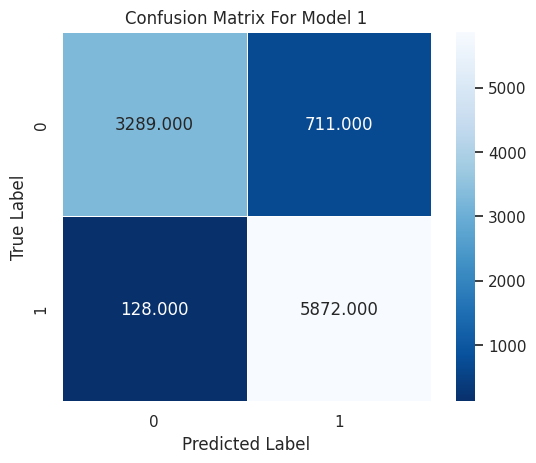

In [22]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_1,y_hat_temp_1)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_1,y_hat_temp_1))
print('Recall score: ',metrics.recall_score(y_test_temp_1,y_hat_temp_1))
print('F1 score: ',metrics.f1_score(y_test_temp_1,y_hat_temp_1))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
sns.heatmap(cm_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_1[0,0])
print("\tTrue Negatives:",cm_1[0,1])
print("\tFalse Positives:",cm_1[1,1])
print("\tFalse Negatives:",cm_1[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 1")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 90.14999999999999%
Precision:  0.9481680071492404
Recall score:  0.8841666666666667
F1 score:  0.9150495903406641
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3710
	True Negatives: 290
	False Positives: 5305
	False Negatives: 695



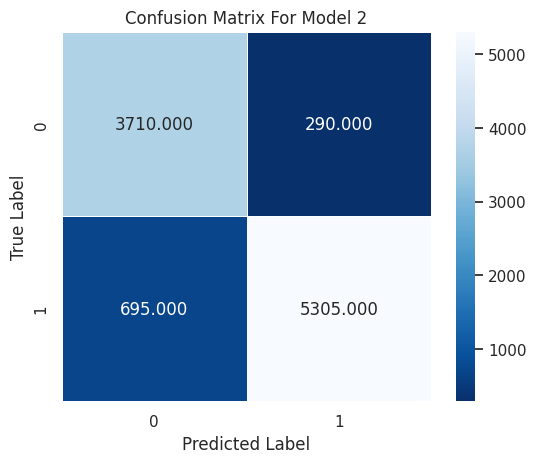

In [23]:

print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_2,y_hat_temp_2)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_2,y_hat_temp_2))
print('Recall score: ',metrics.recall_score(y_test_temp_2,y_hat_temp_2))
print('F1 score: ',metrics.f1_score(y_test_temp_2,y_hat_temp_2))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_2[0,0])
print("\tTrue Negatives:",cm_2[0,1])
print("\tFalse Positives:",cm_2[1,1])
print("\tFalse Negatives:",cm_2[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 2")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 85.68%
Precision:  0.8381699733491265
Recall score:  0.9435
F1 score:  0.8877214991375254
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 2907
	True Negatives: 1093
	False Positives: 5661
	False Negatives: 339



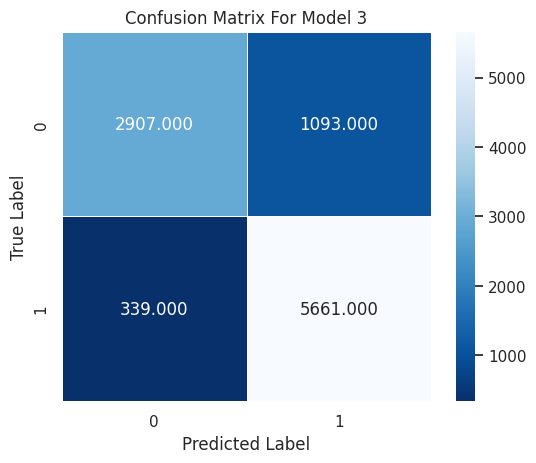

In [24]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_3,y_hat_temp_3)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_3,y_hat_temp_3))
print('Recall score: ',metrics.recall_score(y_test_temp_3,y_hat_temp_3))
print('F1 score: ',metrics.f1_score(y_test_temp_3,y_hat_temp_3))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_3[0,0])
print("\tTrue Negatives:",cm_3[0,1])
print("\tFalse Positives:",cm_3[1,1])
print("\tFalse Negatives:",cm_3[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 3")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 88.84%
Precision:  0.8528901734104046
Recall score:  0.9836666666666667
F1 score:  0.9136222910216719
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 2982
	True Negatives: 1018
	False Positives: 5902
	False Negatives: 98



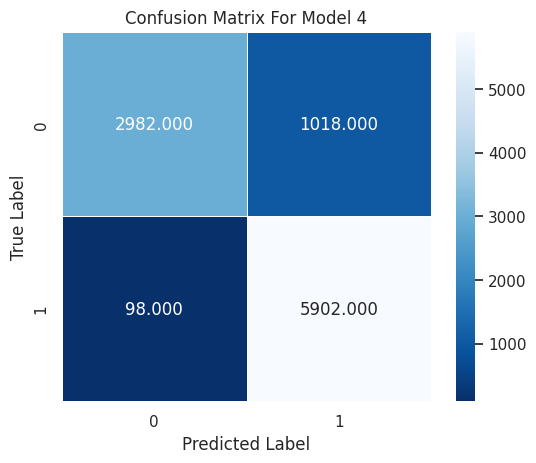

In [25]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_4,y_hat_temp_4)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_4,y_hat_temp_4))
print('Recall score: ',metrics.recall_score(y_test_temp_4,y_hat_temp_4))
print('F1 score: ',metrics.f1_score(y_test_temp_4,y_hat_temp_4))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_4, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_4[0,0])
print("\tTrue Negatives:",cm_4[0,1])
print("\tFalse Positives:",cm_4[1,1])
print("\tFalse Negatives:",cm_4[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 4")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 91.88%
Precision:  0.90569283703472
Recall score:  0.9651666666666666
F1 score:  0.9344844279490075
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3397
	True Negatives: 603
	False Positives: 5791
	False Negatives: 209



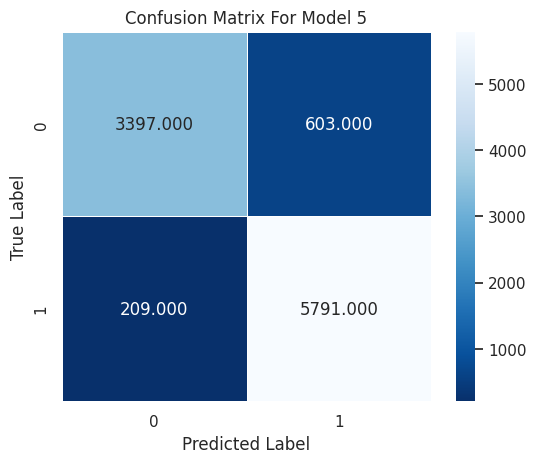

In [26]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_5,y_hat_temp_5)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_5,y_hat_temp_5))
print('Recall score: ',metrics.recall_score(y_test_temp_5,y_hat_temp_5))
print('F1 score: ',metrics.f1_score(y_test_temp_5,y_hat_temp_5))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_5, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_5[0,0])
print("\tTrue Negatives:",cm_5[0,1])
print("\tFalse Positives:",cm_5[1,1])
print("\tFalse Negatives:",cm_5[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 5")
plt.show()


---------------------------
	Performance Metrics 

---------------------------
The accuracy is 89.94%
Precision:  0.9018345671065336
Recall score:  0.934
F1 score:  0.9176355002456199
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3390
	True Negatives: 610
	False Positives: 5604
	False Negatives: 396



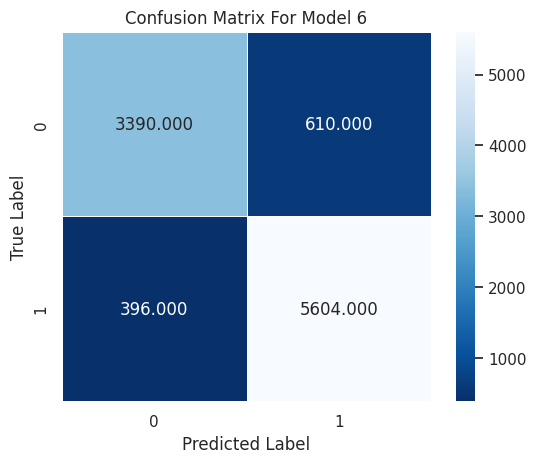

In [27]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_test_temp_6,y_hat_temp_6)*100)+"%")
print('Precision: ',metrics.precision_score(y_test_temp_6,y_hat_temp_6))
print('Recall score: ',metrics.recall_score(y_test_temp_6,y_hat_temp_6))
print('F1 score: ',metrics.f1_score(y_test_temp_6,y_hat_temp_6))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
sns.set()

sns.heatmap(cm_6, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_6[0,0])
print("\tTrue Negatives:",cm_6[0,1])
print("\tFalse Positives:",cm_6[1,1])
print("\tFalse Negatives:",cm_6[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 6")
plt.show()

In [28]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [31]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       9728      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 6, 6, 128)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 64)         

# Complex Neural Network Architecture

# the best one

In [34]:
# model.evaluate(X_test,y_test) # model save krna hai
def build_m3(learning_rate=.001):
    model = models.Sequential()

    # 1st block
    model.add(layers.Conv2D(32, (3,3), padding='same',
    input_shape=(32,32,3), activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(32, (3,3), padding='same',
      activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.2))

    # 2nd block

    model.add(layers.Conv2D(64, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(64, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.3))

    # 3d block
    model.add(layers.Conv2D(128, (3,3), padding='same',
    activation='relu'))


    model.add(layers.BatchNormalization())

    model.add(layers.Conv2D(128, (3,3), padding='same',
    activation='relu'))

    model.add(layers.BatchNormalization())

    model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Dropout(0.4))

    # dense
    model.add(layers.Flatten())
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

Compiling and fitting the model

In [35]:
model_3_cnn_a = build_m3()
model_3_cnn_b = build_m3(learning_rate=.0001)
model_3_cnn_c = build_m3(learning_rate=.00001)
hist_cnn_3a = model_3_cnn_a.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2)
hist_cnn_3b = model_3_cnn_b.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2)
hist_cnn_3c = model_3_cnn_c.fit(X_train,y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=EPOCHS, validation_split = .2)

Epoch 1/10
313/313 [==============================] - 15s 25ms/step - loss: 0.3108 - accuracy: 0.8911 - val_loss: 0.8448 - val_accuracy: 0.5256
Epoch 2/10
313/313 [==============================] - 7s 23ms/step - loss: 0.2099 - accuracy: 0.9204 - val_loss: 0.2506 - val_accuracy: 0.8980
Epoch 3/10
313/313 [==============================] - 7s 23ms/step - loss: 0.1765 - accuracy: 0.9321 - val_loss: 0.1885 - val_accuracy: 0.9290
Epoch 4/10
313/313 [==============================] - 7s 23ms/step - loss: 0.1530 - accuracy: 0.9421 - val_loss: 0.1470 - val_accuracy: 0.9411
Epoch 5/10
313/313 [==============================] - 7s 24ms/step - loss: 0.1355 - accuracy: 0.9473 - val_loss: 0.1623 - val_accuracy: 0.9382
Epoch 6/10
313/313 [==============================] - 7s 23ms/step - loss: 0.1243 - accuracy: 0.9518 - val_loss: 0.1525 - val_accuracy: 0.9411
Epoch 7/10
313/313 [==============================] - 7s 24ms/step - loss: 0.1155 - accuracy: 0.9554 - val_loss: 0.2332 - val_accuracy: 0.917

Plot Accuracy

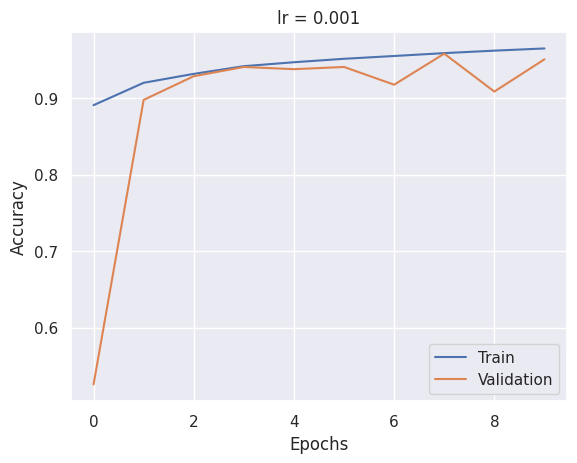

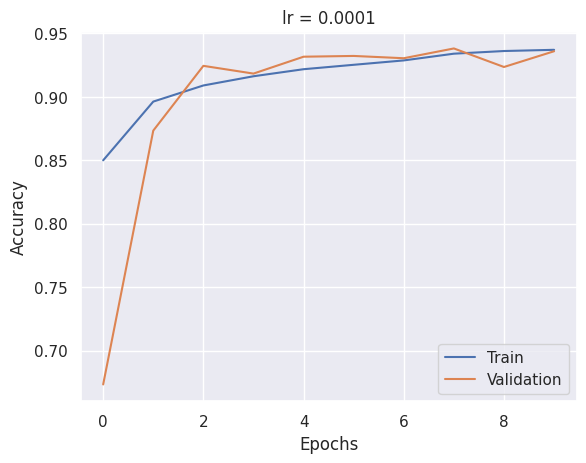

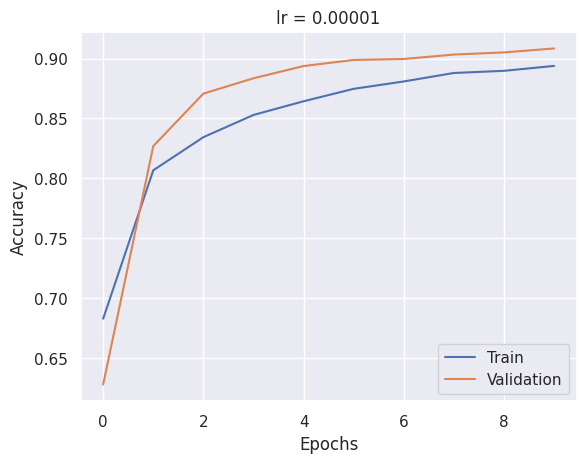

In [36]:
sns.set()
plt.plot(hist_cnn_3a.history['accuracy'])
plt.plot(hist_cnn_3a.history['val_accuracy'])
plt.title("lr = 0.001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3b.history['accuracy'])
plt.plot(hist_cnn_3b.history['val_accuracy'])
plt.title("lr = 0.0001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3c.history['accuracy'])
plt.plot(hist_cnn_3c.history['val_accuracy'])
plt.title("lr = 0.00001")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

Plot Loss

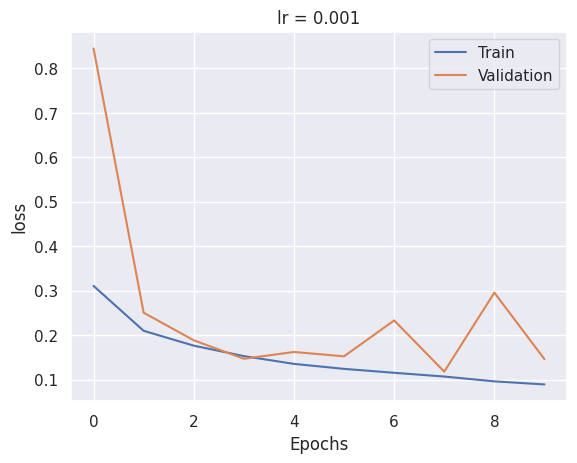

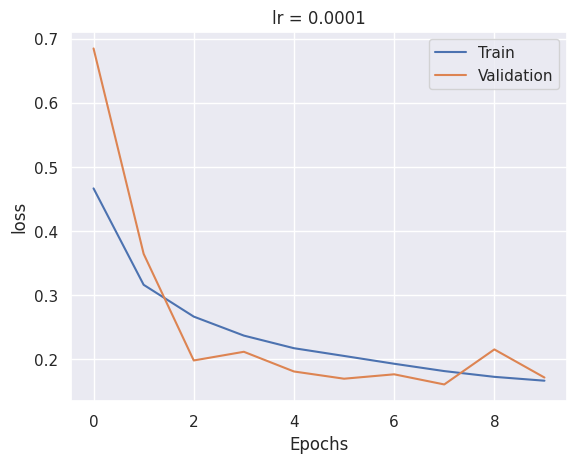

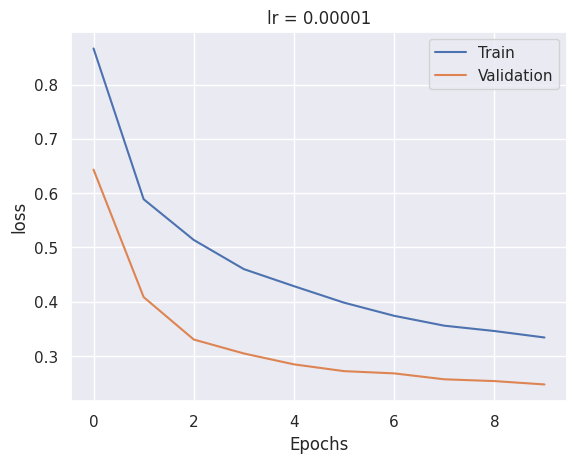

In [37]:
plt.plot(hist_cnn_3a.history['loss'])
plt.plot(hist_cnn_3a.history['val_loss'])
plt.title("lr = 0.001")
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3b.history['loss'])
plt.plot(hist_cnn_3b.history['val_loss'])
plt.title("lr = 0.0001")
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

plt.plot(hist_cnn_3c.history['loss'])
plt.plot(hist_cnn_3c.history['val_loss'])
plt.title("lr = 0.00001")
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])

plt.show()

Evaluating on the Test set

In [38]:
print(model_3_cnn_a.evaluate(X_test,y_test))
print(model_3_cnn_b.evaluate(X_test,y_test))
print(model_3_cnn_c.evaluate(X_test,y_test))

313/313 [==============================] - 2s 6ms/step - loss: 0.1464 - accuracy: 0.9496
[0.14643646776676178, 0.9495999813079834]
313/313 [==============================] - 1s 4ms/step - loss: 0.1728 - accuracy: 0.9348
[0.1728125661611557, 0.9348000288009644]
313/313 [==============================] - 1s 4ms/step - loss: 0.2427 - accuracy: 0.9094
[0.24268481135368347, 0.9093999862670898]


Making Predictions

In [39]:
y_hat_cnn_1 = model_3_cnn_a.predict(X_test)
y_hat_cnn_2 = model_3_cnn_b.predict(X_test)
y_hat_cnn_3 = model_3_cnn_c.predict(X_test)

y_test_temp = np.argmax(y_test, axis=1)
y_hat_temp_1 = np.argmax(y_hat_cnn_1, axis=1)
cm_7 = confusion_matrix(y_prac_test,y_hat_temp_1)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_7[0,0])
print("\tTrue Negatives:",cm_7[0,1])
print("\tFalse Positives:",cm_7[1,1])
print("\tFalse Negatives:",cm_7[1,0])

313/313 [==============================] - 1s 3ms/step
	Confusion Matrix: 

	True Positives: 3786
	True Negatives: 214
	False Positives: 5710
	False Negatives: 290


In [40]:
y_hat_temp_2 = np.argmax(y_hat_cnn_2, axis=1)
cm_8 = confusion_matrix(y_prac_test,y_hat_temp_2)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_8[0,0])
print("\tTrue Negatives:",cm_8[0,1])
print("\tFalse Positives:",cm_8[1,1])
print("\tFalse Negatives:",cm_8[1,0])

	Confusion Matrix: 

	True Positives: 3498
	True Negatives: 502
	False Positives: 5850
	False Negatives: 150


In [41]:
y_hat_temp_3 = np.argmax(y_hat_cnn_3, axis=1)
cm_9 = confusion_matrix(y_prac_test,y_hat_temp_3)


print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_9[0,0])
print("\tTrue Negatives:",cm_9[0,1])
print("\tFalse Positives:",cm_9[1,1])
print("\tFalse Negatives:",cm_9[1,0])

	Confusion Matrix: 

	True Positives: 3416
	True Negatives: 584
	False Positives: 5678
	False Negatives: 322


---------------------------
	Performance Metrics 

---------------------------
The accuracy is 94.96%
Precision:  0.9638757596218771
Recall score:  0.9516666666666667
F1 score:  0.9577323045957732
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3786
	True Negatives: 214
	False Positives: 5710
	False Negatives: 290



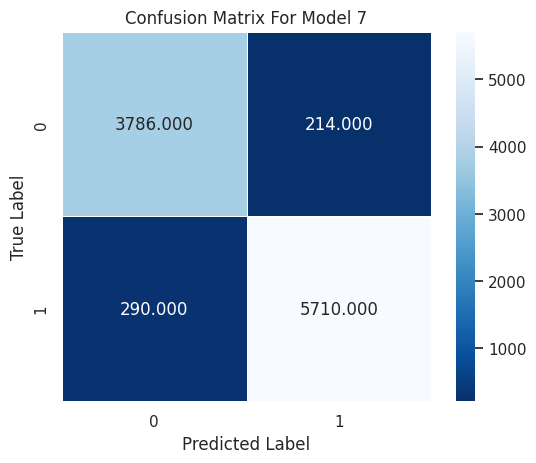

In [42]:


print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_temp_1)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_temp_1))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_temp_1))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_temp_1))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")
sns.set()

sns.heatmap(cm_7, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_7[0,0])
print("\tTrue Negatives:",cm_7[0,1])
print("\tFalse Positives:",cm_7[1,1])
print("\tFalse Negatives:",cm_7[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 7")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 93.47999999999999%
Precision:  0.9209697732997482
Recall score:  0.975
F1 score:  0.9472150259067357
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3498
	True Negatives: 502
	False Positives: 5850
	False Negatives: 150



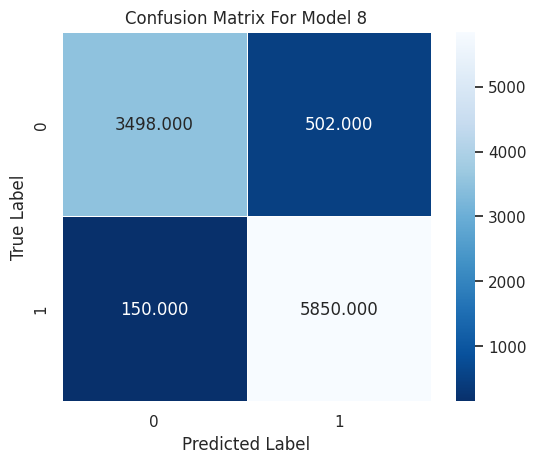

In [43]:



print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_temp_2)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_temp_2))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_temp_2))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_temp_2))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_8, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_8[0,0])
print("\tTrue Negatives:",cm_8[0,1])
print("\tFalse Positives:",cm_8[1,1])
print("\tFalse Negatives:",cm_8[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 8")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 90.94%
Precision:  0.9067390610028745
Recall score:  0.9463333333333334
F1 score:  0.9261131952373186
---------------------------
	Confusion Matrix:
---------------------------
	True Positives: 3416
	True Negatives: 584
	False Positives: 5678
	False Negatives: 322



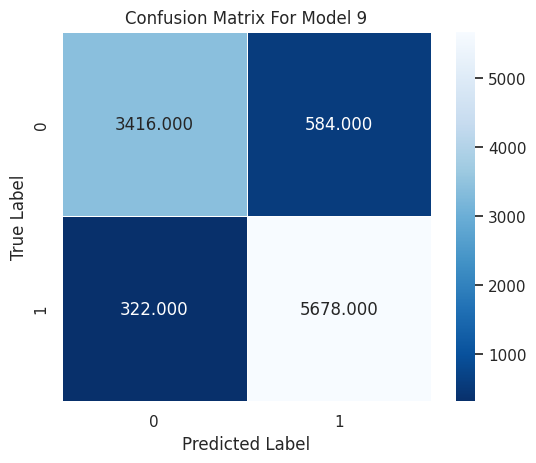

In [44]:


print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_temp_3)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_temp_3))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_temp_3))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_temp_3))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

sns.heatmap(cm_9, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tTrue Positives:",cm_9[0,0])
print("\tTrue Negatives:",cm_9[0,1])
print("\tFalse Positives:",cm_9[1,1])
print("\tFalse Negatives:",cm_9[1,0])
print("")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 9")
plt.show()


In [45]:
model_3_cnn_a.save('cnn_95a.h5')
model_3_cnn_b.save('cnn_95b.h5')
model_3_cnn_c.save('cnn_95c.h5')

In [46]:
# saving md=odel to json # same as prev
model_json = model_3_cnn_a.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_3_cnn_a.save_weights("model_new.h5")
print("Saved model to disk")

Saved model to disk


In [47]:
"""
# load json and create model
json_file = open('model_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_new.h5")
print("Loaded model from disk")"""

'\n# load json and create model\njson_file = open(\'model_new.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model_new.h5")\nprint("Loaded model from disk")'

# Non Parametric -- KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_1 = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
knn_2 = KNeighborsClassifier(n_neighbors=9,algorithm='auto')
knn_3 = KNeighborsClassifier(n_neighbors=13,algorithm='auto')

In [50]:
X_train_reshaped_for_shallow= X_train.reshape(X_train.shape[0],3072)
X_test_reshaped_for_shallow = X_test.reshape(X_test.shape[0],3072) # since knn needs 2 dims.. we change the dimensions to (50000, 32x32x3=)

In [51]:
knn_1.fit(X_train_reshaped_for_shallow, y_prac_train)
knn_2.fit(X_train_reshaped_for_shallow, y_prac_train)
knn_3.fit(X_train_reshaped_for_shallow, y_prac_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [52]:
y_hat_knn_1=knn_1.predict(X_test_reshaped_for_shallow)
y_hat_knn_2=knn_2.predict(X_test_reshaped_for_shallow)
y_hat_knn_3=knn_3.predict(X_test_reshaped_for_shallow)

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 80.78999999999999%
Precision:  0.7997060984570169
Recall score:  0.907
F1 score:  0.8499804763764155
---------------------------
	Confusion Matrix:
---------------------------
	Confusion Matrix: 

	True Positives: 2637
	True Negatives: 1363
	False Positives: 5442
	False Negatives: 558


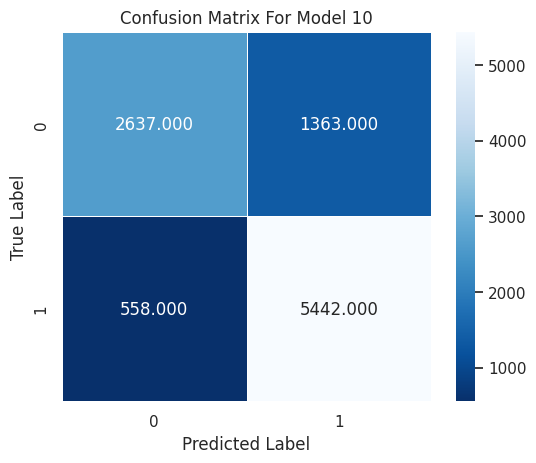

In [54]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_knn_1)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_knn_1))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_knn_1))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_knn_1))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_10 = confusion_matrix(y_prac_test,y_hat_knn_1)

sns.heatmap(cm_10, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_10[0,0])
print("\tTrue Negatives:",cm_10[0,1])
print("\tFalse Positives:",cm_10[1,1])
print("\tFalse Negatives:",cm_10[1,0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 10")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 80.7%
Precision:  0.7955271565495208
Recall score:  0.913
F1 score:  0.8502250504423405
---------------------------
	Confusion Matrix:
---------------------------
	Confusion Matrix: 

	True Positives: 2592
	True Negatives: 1408
	False Positives: 5478
	False Negatives: 522


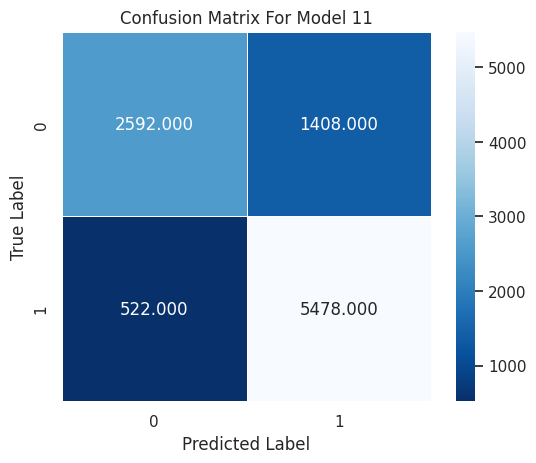

In [55]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_knn_2)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_knn_2))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_knn_2))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_knn_2))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_11 = confusion_matrix(y_prac_test,y_hat_knn_2)

sns.heatmap(cm_11, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_11[0,0])
print("\tTrue Negatives:",cm_11[0,1])
print("\tFalse Positives:",cm_11[1,1])
print("\tFalse Negatives:",cm_11[1,0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 11")
plt.show()

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 80.22%
Precision:  0.7911960613958876
Recall score:  0.9106666666666666
F1 score:  0.8467379513404617
---------------------------
	Confusion Matrix:
---------------------------
	Confusion Matrix: 

	True Positives: 2558
	True Negatives: 1442
	False Positives: 5464
	False Negatives: 536


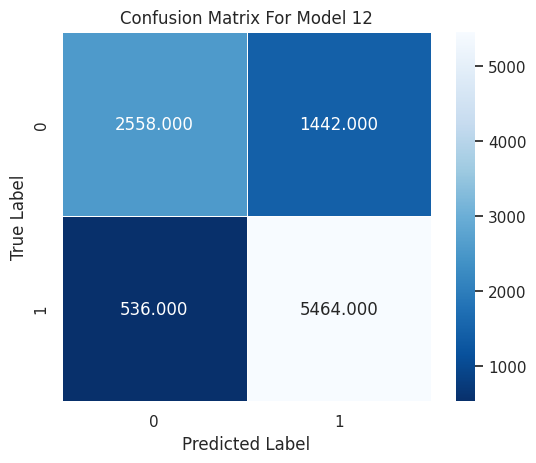

In [56]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_knn_3)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_knn_3))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_knn_3))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_knn_3))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_12 = confusion_matrix(y_prac_test,y_hat_knn_3)

sns.heatmap(cm_12, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

print("\tConfusion Matrix: \n")
print("\tTrue Positives:",cm_12[0,0])
print("\tTrue Negatives:",cm_12[0,1])
print("\tFalse Positives:",cm_12[1,1])
print("\tFalse Negatives:",cm_12[1,0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix For Model 12")
plt.show()

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.metrics import confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Assuming you have predictions y_hat_knn_1, y_hat_knn_2, and y_hat_knn_3
# Replace y_test_reshaped_for_knn with the true labels

# Accuracy
accuracy_knn_1 = accuracy_score(y_prac_test, y_hat_knn_1)
accuracy_knn_2 = accuracy_score(y_prac_test, y_hat_knn_2)
accuracy_knn_3 = accuracy_score(y_prac_test, y_hat_knn_3)

# Precision
precision_knn_1 = precision_score(y_prac_test, y_hat_knn_1)
precision_knn_2 = precision_score(y_prac_test, y_hat_knn_2)
precision_knn_3 = precision_score(y_prac_test, y_hat_knn_3)

# Recall
recall_knn_1 = recall_score(y_prac_test, y_hat_knn_1)
recall_knn_2 = recall_score(y_prac_test, y_hat_knn_2)
recall_knn_3 = recall_score(y_prac_test, y_hat_knn_3)

# F1 Score
f1_knn_1 = f1_score(y_prac_test, y_hat_knn_1)
f1_knn_2 = f1_score(y_prac_test, y_hat_knn_2)
f1_knn_3 = f1_score(y_prac_test, y_hat_knn_3)

# Specificity
specificity_knn_1 = specificity_score(y_prac_test, y_hat_knn_1)
specificity_knn_2 = specificity_score(y_prac_test, y_hat_knn_2)
specificity_knn_3 = specificity_score(y_prac_test, y_hat_knn_3)

# ROC Curve and AUC
fpr_knn_1, tpr_knn_1, thresholds_knn_1 = roc_curve(y_prac_test, y_hat_knn_1)
auc_knn_1 = roc_auc_score(y_prac_test, y_hat_knn_1)

fpr_knn_2, tpr_knn_2, thresholds_knn_2 = roc_curve(y_prac_test, y_hat_knn_2)
auc_knn_2 = roc_auc_score(y_prac_test, y_hat_knn_2)

fpr_knn_3, tpr_knn_3, thresholds_knn_3 = roc_curve(y_prac_test, y_hat_knn_3)
auc_knn_3 = roc_auc_score(y_prac_test, y_hat_knn_3)

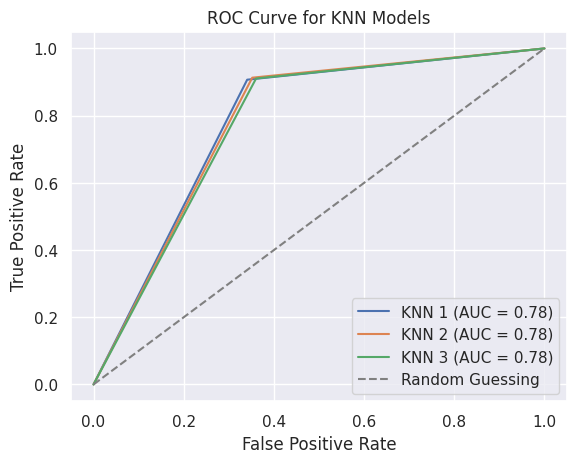

In [153]:
import matplotlib.pyplot as plt

# Plot ROC Curve for KNN 1
plt.plot(fpr_knn_1, tpr_knn_1, label="KNN 1 (AUC = {:.2f})".format(auc_knn_1))

# Plot ROC Curve for KNN 2
plt.plot(fpr_knn_2, tpr_knn_2, label="KNN 2 (AUC = {:.2f})".format(auc_knn_2))

# Plot ROC Curve for KNN 3
plt.plot(fpr_knn_3, tpr_knn_3, label="KNN 3 (AUC = {:.2f})".format(auc_knn_3))

# Plot the diagonal line representing random guessing (not useful classifier)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guessing")

# Set plot labels and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Models")
plt.legend()

# Show the plot
plt.show()

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr_m1 = LogisticRegression(max_iter=1000)
lr_m2 = LogisticRegression(max_iter=500)
lr_m3 = LogisticRegression(max_iter=10000)

In [59]:
lr_m1.fit(X_train_reshaped_for_shallow, y_prac_train
          )

lr_m2.fit(X_train_reshaped_for_shallow, y_prac_train
          )

lr_m3.fit(X_train_reshaped_for_shallow, y_prac_train
          )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

LogisticRegression(max_iter=10000)

In [60]:
y_hat_lr_m1 = lr_m1.predict(X_test_reshaped_for_shallow)
y_hat_lr_m2 = lr_m2.predict(X_test_reshaped_for_shallow)
y_hat_lr_m3 = lr_m3.predict(X_test_reshaped_for_shallow)

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 81.56%
Precision:  0.8308917197452229
Recall score:  0.8696666666666667
F1 score:  0.8498371335504886
---------------------------
	Confusion Matrix:
---------------------------


<Axes: >

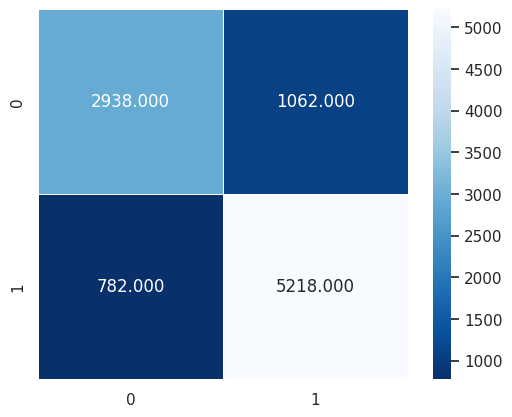

In [61]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_lr_m1)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_lr_m1))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_lr_m1))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_lr_m1))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_13=confusion_matrix(y_prac_test,y_hat_lr_m1 )
sns.heatmap(cm_13, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 81.74%
Precision:  0.8326426522154925
Recall score:  0.8706666666666667
F1 score:  0.8512302427896365
---------------------------
	Confusion Matrix:
---------------------------


<Axes: >

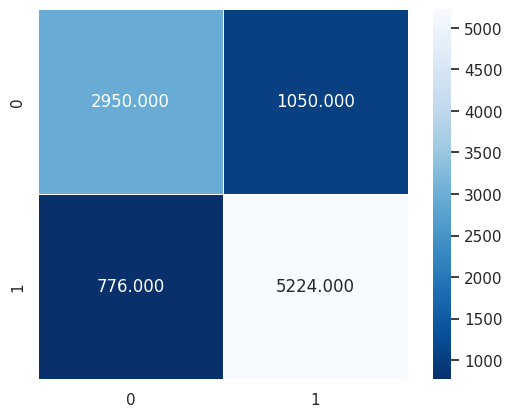

In [62]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_lr_m2)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_lr_m2))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_lr_m2))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_lr_m2))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_14=confusion_matrix(y_prac_test,y_hat_lr_m2 )
sns.heatmap(cm_14, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

---------------------------
	Performance Metrics 

---------------------------
The accuracy is 81.66%
Precision:  0.8313713013044861
Recall score:  0.871
F1 score:  0.8507244017580987
---------------------------
	Confusion Matrix:
---------------------------


<Axes: >

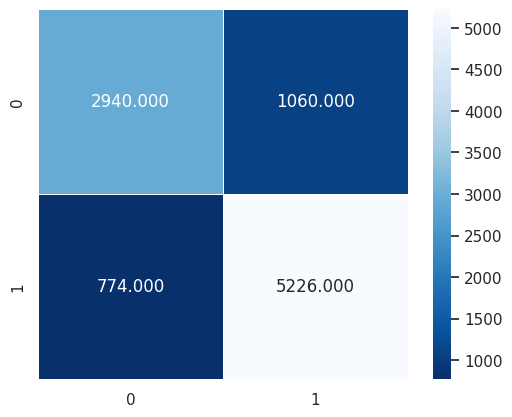

In [63]:
print("---------------------------")
print('\tPerformance Metrics \n')
print("---------------------------")
print("The accuracy is "+str(metrics.accuracy_score(y_prac_test,y_hat_lr_m3)*100)+"%")
print('Precision: ',metrics.precision_score(y_prac_test,y_hat_lr_m3))
print('Recall score: ',metrics.recall_score(y_prac_test,y_hat_lr_m3))
print('F1 score: ',metrics.f1_score(y_prac_test,y_hat_lr_m3))

print("---------------------------")
print('\tConfusion Matrix:')
print("---------------------------")

cm_15 = confusion_matrix(y_prac_test,y_hat_lr_m3 )
sns.heatmap(cm_15, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

In [64]:
print(lr_m1.coef_)
print(lr_m2.coef_)
print(lr_m3.coef_)

[[-0.21293959  0.53539295 -1.46313228 ...  0.1999252   0.9398969
  -0.59426062]]
[[-0.21315459  0.17814224 -1.13366686 ...  0.30080217  0.65509022
  -0.56033929]]
[[-0.19338072  0.67655832 -1.60369663 ...  0.1079959   1.03135918
  -0.65103354]]


In [65]:
print(lr_m1.intercept_)
print(lr_m2.intercept_)
print(lr_m3.intercept_)

[1.75849393]
[1.72991949]
[1.76000595]


In [66]:
import pickle

with open('lr_m2.pkl', 'wb') as f: # c
    pickle.dump(lr_m2, f)

with open('cm_lr.pkl', 'wb') as f:
    pickle.dump(cm_14, f)

with open('knn_2.pkl', 'wb') as f:
    pickle.dump(knn_2, f)

with open('cm_knn.pkl', 'wb') as f:
    pickle.dump(cm_11, f)

with open('cm_cnn.pkl', 'wb') as f:
    pickle.dump(cm_7, f)

with open('cnn_hist.pkl', 'wb') as f:
    pickle.dump(hist_cnn_3a, f)

# interface

In [69]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# json_file = open('model_new.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model_new.h5")
# print("Loaded model from disk")

In [72]:
img = cv2.imread('horse-img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

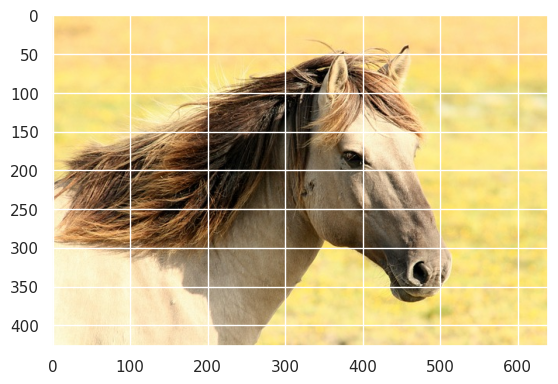

In [73]:
img = (img/255)
plt.imshow(img)

In [74]:
img = tf.image.resize(img,(32,32))

In [75]:
img.shape
new_img = np.expand_dims(img,0)

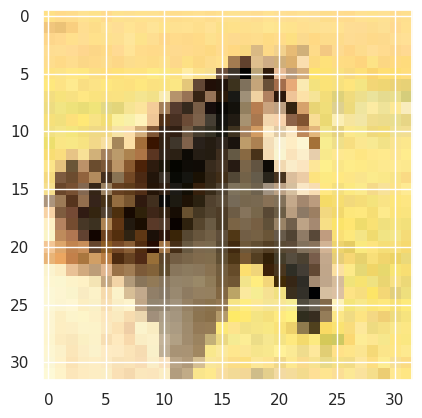

In [76]:
loaded_model=load_model('cnn_95a.h5')
plt.imshow(img)

In [148]:
class Inter:
    def __init__(self):
#         self.img_pth = input("Enter Image name: ")
        self.classes = {0: 'Vehicle', 1:'Animal'}
        self.classes_knn = {0:'Animal', 1:'Vehicle'}
        self.cnn = load_model('cnn_95a.h5')


        with open('lr_m2.pkl', 'rb') as f:
            self.lr = pickle.load(f)

        with open('knn_2.pkl', 'rb') as f:
            self.knn = pickle.load(f)


        print(self)

    def preprocess_image(self, img):
        img = img/255
        img = tf.image.resize(img,(32,32))
        return img


    def visualize(self):
        with open('cm_cnn.pkl', 'rb') as f:
            self.cnn.cm = pickle.load(f)


        with open('cm_knn.pkl', 'rb') as f:
            self.knn.cm = pickle.load(f)


        with open('cm_lr.pkl', 'rb') as f:
            self.lr.cm = pickle.load(f)

        with open('cnn_hist.pkl', 'rb') as f:
            self.cnn.hist = pickle.load(f)


        plt.plot(self.cnn.hist.history['accuracy'])
        plt.plot(self.cnn.hist.history['val_accuracy'])
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.title("Model Accuracy for CNN")
        plt.legend(['Train', 'Validation'])
        plt.show()


        plt.plot(self.cnn.hist.history['loss'])
        plt.plot(self.cnn.hist.history['val_loss'])
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.title("Model Loss for CNN")
        plt.legend(['Train', 'Validation'])
        plt.show()



        print("---------------------------")
        print('\tConfusion Matrices:')
        print("---------------------------")
        sns.set()

        sns.heatmap(self.cnn.cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
        print("\tTrue Positives:",self.cnn.cm[0,0])
        print("\tTrue Negatives:",self.cnn.cm[0,1])
        print("\tFalse Positives:",self.cnn.cm[1,1])
        print("\tFalse Negatives:",self.cnn.cm[1,0])
        print("")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix For CNN")
        plt.show()


        sns.heatmap(self.knn.cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
        print("\tTrue Positives:",self.knn.cm[0,0])
        print("\tTrue Negatives:",self.knn.cm[0,1])
        print("\tFalse Positives:",self.knn.cm[1,1])
        print("\tFalse Negatives:",self.knn.cm[1,0])
        print("")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix For CNN")
        plt.show()

        sns.heatmap(self.lr.cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
        print("\tTrue Positives:",self.lr.cm[0,0])
        print("\tTrue Negatives:",self.lr.cm[0,1])
        print("\tFalse Positives:",self.lr.cm[1,1])
        print("\tFalse Negatives:",self.lr.cm[1,0])
        print("")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix For CNN")
        plt.show()


#         self.image = np.expand_dims(img,0)


    def menu(self):
        print("Select Alogorithm: \n===========================\n")
        print("\t 1. Convolutional Neural Network")
        print("\t 2. K Nearest Neighbours")
        print("\t 3. Logistic Regression")
        pass
        print()
        self.choice = input("Enter option: \n=======================\n")


    def predict(self, img_path=None):
        self.menu()

        if self.choice == "1":



            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.imshow(img)


            img = self.preprocess_image(img)
            self.image = np.expand_dims(img,0)
            self.predictions = self.cnn.predict(self.image)
            print("\n")

            print('================== Probabilities =====================')
            for i in range(2):
                print(f'Confidence of image being {self.classes[i]:10}: {self.predictions[0][i]}')
            print("\n")

            print("====================== Prediction ========================")
            print("The Image is: "+ self.classes[np.argmax(self.predictions)])
            print("\n==============================")


        elif self.choice == "2":

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            plt.imshow(img, cmap='gray')  # Display the grayscale image

            # Reshape the image to have 3 dimensions
            img = np.expand_dims(img, axis=-1)
            img = tf.image.resize(img, (3072, 1))

            img = img / 255.0

            # Remove the last dimension
            img = np.squeeze(img)

            img.shape

            self.predictions = (self.knn.predict([img]))

            print("====================== Prediction ========================")
            print()
            print("The Image is: "+ self.classes_knn[self.predictions[0]])
            print("\n==============================")


        elif self.choice == "3":


            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            plt.imshow(img, cmap='gray')  # Display the grayscale image

            # Reshape the image to have 3 dimensions
            img = np.expand_dims(img, axis=-1)
            img = tf.image.resize(img, (3072, 1))

            img = img / 255.0

            # Remove the last dimension
            img = np.squeeze(img)

            img.shape

            self.predictions = (self.lr.predict([img]))

            print("====================== Prediction ========================")
            print()
            print("The Image is: "+ self.classes[self.predictions[0]])
            print("\n==============================")







    def __str__(self):


        return """Trained on the cifar10 dataset with the following characteristics
==============================================================
Size of the Train Set: [50000,32,32,3]
Size of the Test Set: [10000,32,32,3]
==============================================================
The Implementation is Such that it Resizes the Image Before Passing it to the Neural Network Architecture.
        """





In [149]:
i=Inter()

Trained on the cifar10 dataset with the following characteristics
Size of the Train Set: [50000,32,32,3]
Size of the Test Set: [10000,32,32,3]
The Implementation is Such that it Resizes the Image Before Passing it to the Neural Network Architecture.
        


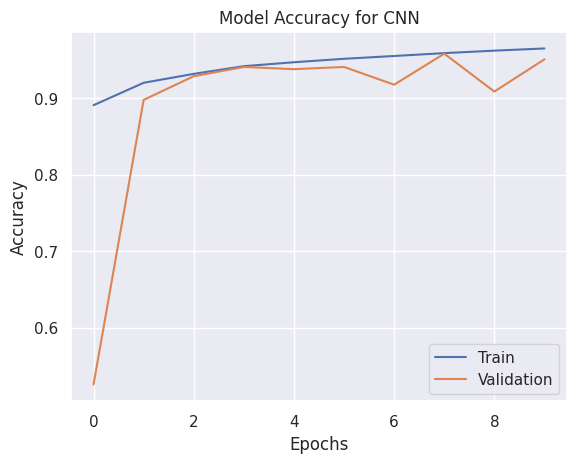

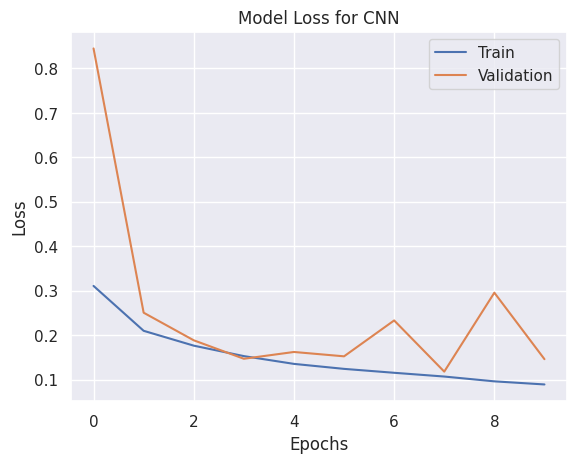

---------------------------
	Confusion Matrices:
---------------------------
	True Positives: 3786
	True Negatives: 214
	False Positives: 5710
	False Negatives: 290



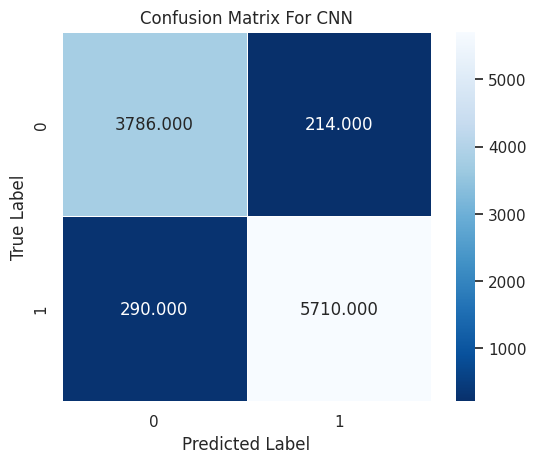

	True Positives: 2592
	True Negatives: 1408
	False Positives: 5478
	False Negatives: 522



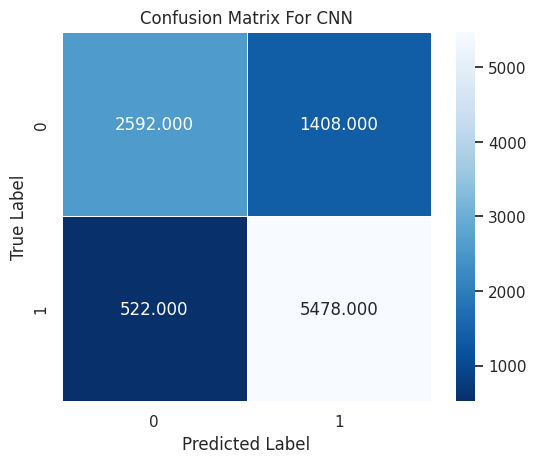

	True Positives: 2950
	True Negatives: 1050
	False Positives: 5224
	False Negatives: 776



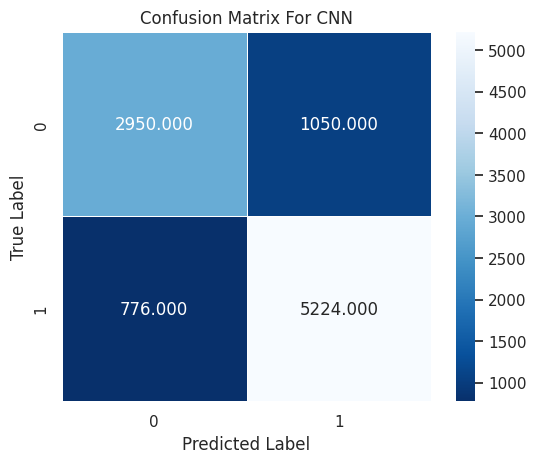

In [150]:
i.visualize()

Select Alogorithm: 

	 1. Convolutional Neural Network
	 2. K Nearest Neighbours
	 3. Logistic Regression

Enter option: 
3
====================== Prediction ========================

The Image is: Vehicle



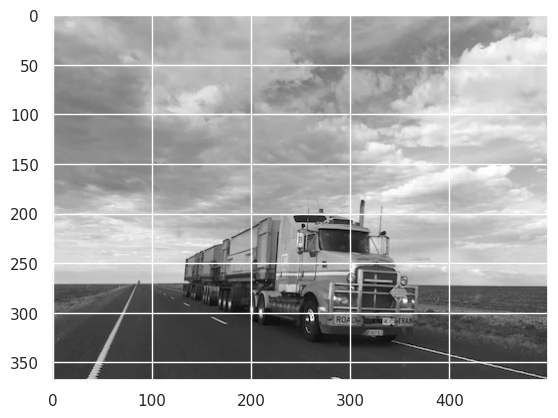

In [147]:
i.predict('truck.jpg')